<h2 align="center"> EV/Hybrid market Analysis<h2>

In [64]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

***
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 3 csv file  :
   - electric_vehicle_sales_by_state.csv  
   - electric_vehicle_sales_by_makers.csv  
   - dim_date.csv

Read all data from the file

In [65]:
df_salebymaker = pd.read_csv('datasets/electric_vehicle_sales_by_makers.csv')
df_salebystate = pd.read_csv('datasets/electric_vehicle_sales_by_state.csv')
df_dimdate = pd.read_csv('datasets/dim_date.csv')

Explore the sales by maker

In [66]:
df_salebymaker.head(10)

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0
5,01-Aug-21,2-Wheelers,OLA ELECTRIC,0
6,01-Sep-21,2-Wheelers,OLA ELECTRIC,0
7,01-Oct-21,2-Wheelers,OLA ELECTRIC,0
8,01-Nov-21,2-Wheelers,OLA ELECTRIC,0
9,01-Apr-21,4-Wheelers,BYD India,0


In [67]:
df_salebymaker.describe().round(2)   #Know about the dataset

,electric_vehicles_sold
count,816.00
mean,2532.00
std,4771.08
min,0.00
25%,42.00
50%,662.00
75%,2636.50
max,44630.00


In [68]:
df_salebymaker.isnull().sum()   #Check the whether there is null value or not.

date                      0
vehicle_category          0
maker                     0
electric_vehicles_sold    0
dtype: int64

In [69]:
df_salebymaker.shape #Size of row and  column

(816, 4)

In [70]:
df_salebymaker.vehicle_category.unique()

array(['2-Wheelers', '4-Wheelers'], dtype=object)

In [71]:
marker = df_salebymaker.maker.unique()
marker.sort()
print(marker)
print("\nNumber of maker in India ",df_salebymaker.maker.unique().size)

['AMPERE' 'ATHER' 'BAJAJ' 'BATTRE ELECTRIC' 'BEING' 'BGAUSS' 'BMW India'
 'BYD India' 'HERO ELECTRIC' 'Hyundai Motor' 'JITENDRA' 'KIA Motors'
 'KINETIC GREEN' 'MG Motor' 'Mahindra & Mahindra' 'Mercedes -Benz AG'
 'OKAYA EV' 'OKINAWA' 'OLA ELECTRIC' 'OTHERS' 'PCA Automobiles' 'PURE EV'
 'REVOLT' 'TVS' 'Tata Motors' 'Volvo Auto India']

Number of maker in India  26


In [72]:
df_salebymaker.groupby(df_salebymaker['maker']).electric_vehicles_sold.sum().sort_values() # Total number cars sold in each maker ie each company

maker
Mercedes -Benz AG         388
KIA Motors                557
Volvo Auto India          568
BMW India                1370
PCA Automobiles          1684
Hyundai Motor            2076
BYD India                2419
BATTRE ELECTRIC          4841
KINETIC GREEN            9585
JITENDRA                12438
MG Motor                13753
BGAUSS                  15051
BEING                   18392
PURE EV                 26524
OKAYA EV                27036
REVOLT                  27828
Mahindra & Mahindra     41193
Tata Motors             88935
BAJAJ                  145606
OTHERS                 156471
OKINAWA                165231
AMPERE                 167274
HERO ELECTRIC          170394
ATHER                  204449
TVS                    272575
OLA ELECTRIC           489473
Name: electric_vehicles_sold, dtype: int64

In [73]:
df_salebystate.head(10)

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229
5,01-Jun-21,Sikkim,4-Wheelers,0,244
6,01-Jul-21,Sikkim,2-Wheelers,0,458
7,01-Jul-21,Sikkim,4-Wheelers,0,452
8,01-Aug-21,Sikkim,2-Wheelers,0,489
9,01-Aug-21,Sikkim,4-Wheelers,0,408


In [74]:
df_salebystate.describe().round(2)

,electric_vehicles_sold,total_vehicles_sold
count,2445.00,2445.00
mean,845.04,23402.97
std,2185.17,38353.27
min,0.00,1.00
25%,2.00,1158.00
50%,54.00,6098.00
75%,534.00,29396.00
max,26668.00,387983.00


In [75]:
df_salebystate.shape

(2445, 5)

In [76]:
states=df_salebystate['state'].unique()
states.sort()
print(states)
print("\nNumber of states where sales takes place ",df_salebystate['state'].unique().size)

['Andaman & Nicobar' 'Andaman & Nicobar Island' 'Andhra Pradesh'
 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'DNH and DD' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu and Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Ladakh'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']

Number of states where sales takes place  35


In [77]:
df_salebystate.isnull().sum()

date                      0
state                     0
vehicle_category          0
electric_vehicles_sold    0
total_vehicles_sold       0
dtype: int64

In [78]:
df_dimdate.head()

,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [79]:
df_dimdate.describe().round(2)

,fiscal_year
count,36.00
mean,2023.00
std,0.83
min,2022.00
25%,2022.00
50%,2023.00
75%,2024.00
max,2024.00


In [80]:
df_dimdate.isnull().sum()

date           0
fiscal_year    0
quarter        0
dtype: int64

***
### ==> 2. Data Cleaning
***

In [81]:
states=df_salebystate['state'].unique()
states.sort()
print(states)
print("\nNumber of states where sales takes place ",df_salebystate['state'].unique().size)

['Andaman & Nicobar' 'Andaman & Nicobar Island' 'Andhra Pradesh'
 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'DNH and DD' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu and Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Ladakh'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']

Number of states where sales takes place  35


In [82]:
df_salebystate['state'] = df_salebystate['state'] .replace('Andaman & Nicobar Island','Andaman & Nicobar')
df_salebystate['state'] = df_salebystate['state'] .replace('Chandigarh','Haryana')

In [83]:
states=df_salebystate['state'].unique()
states.sort()
print(states)
print("\nNumber of states where sales takes place ",df_salebystate['state'].unique().size)

['Andaman & Nicobar' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'DNH and DD' 'Delhi' 'Goa' 'Gujarat' 'Haryana'
 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka' 'Kerala'
 'Ladakh' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram'
 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']

Number of states where sales takes place  33


***
### ==> 3. Data Transformation
***

Create a Penetration Rate column

In [84]:
df_salebystate['Penetration_Rate'] = ((df_salebystate['electric_vehicles_sold']/df_salebystate['total_vehicles_sold'])*100).round(2)

In [85]:
df_salebystate.tail()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,Penetration_Rate
2440,01-Mar-24,Mizoram,2-Wheelers,58,1932,3.00
2441,01-Mar-24,DNH and DD,2-Wheelers,25,780,3.21
2442,01-Mar-24,Manipur,2-Wheelers,13,1394,0.93
2443,01-Mar-24,Andaman & Nicobar,2-Wheelers,2,447,0.45
2444,01-Mar-24,Nagaland,2-Wheelers,2,1180,0.17


In [86]:
df_salebymakerwithdate = df_salebymaker.merge(df_dimdate,how='inner',on='date')  #Combining Date dataframe and sales by maker to know the fyscal year
df_salebymakerwithdate.head()

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
1,01-Apr-22,2-Wheelers,OKAYA EV,0,2023,Q1
2,01-May-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0,2022,Q2


In [87]:
df_salebystatewithdate = df_salebystate.merge(df_dimdate,how='inner',on='date') # Combining Date dataframe and sales by state to know the fyscal year

***
### ==> 4. Insights Generation
***

### 1. List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold.

In [88]:
df_salebymakerwithdate.head()

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
1,01-Apr-22,2-Wheelers,OKAYA EV,0,2023,Q1
2,01-May-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0,2022,Q2


In [89]:
df_salebymakerwithdate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
 4   fiscal_year             816 non-null    int64 
 5   quarter                 816 non-null    object
dtypes: int64(2), object(4)
memory usage: 38.4+ KB


In [90]:
df_salebymaker.vehicle_category.unique()

array(['2-Wheelers', '4-Wheelers'], dtype=object)

Storing data on 2-wheelers sold in the fiscal years 2023 and 2024.

In [91]:
df_2wheelers_sold=df_salebymakerwithdate[(df_salebymakerwithdate['vehicle_category']=='2-Wheelers') & (df_salebymakerwithdate['fiscal_year'] == 2023) | (df_salebymakerwithdate['fiscal_year'] == 2024) ]
df_2wheelers_sold.head(10)

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
1,01-Apr-22,2-Wheelers,OKAYA EV,0,2023,Q1
100,01-Apr-23,4-Wheelers,Tata Motors,364,2024,Q1
101,01-Apr-23,4-Wheelers,MG Motor,265,2024,Q1
102,01-Apr-23,4-Wheelers,Mahindra & Mahindra,4880,2024,Q1
103,01-Apr-23,4-Wheelers,BYD India,156,2024,Q1
104,01-Apr-23,4-Wheelers,Hyundai Motor,42,2024,Q1
105,01-Apr-23,4-Wheelers,PCA Automobiles,181,2024,Q1
106,01-Apr-23,4-Wheelers,BMW India,51,2024,Q1
107,01-Apr-23,4-Wheelers,Mercedes -Benz AG,8,2024,Q1
108,01-Apr-23,4-Wheelers,Volvo Auto India,27,2024,Q1


In [92]:
#Grouping based on fyscal year and maker company
df_highest_evsold=pd.DataFrame(df_2wheelers_sold.groupby(['fiscal_year','maker'],group_keys=False)['electric_vehicles_sold'].sum())
df_highest_evsold=df_highest_evsold.sort_values(by=['fiscal_year','electric_vehicles_sold']).reset_index()

In [93]:
df_highest_evsold.head()

,fiscal_year,maker,electric_vehicles_sold
0,2023,JITENDRA,8563
1,2023,BEING,11018
2,2023,PURE EV,11556
3,2023,REVOLT,12933
4,2023,OKAYA EV,13172


C:\Users\HP\AppData\Local\Temp\ipykernel_13592\3996918980.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='electric_vehicles_sold', y='maker', data=data_year, palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_13592\3996918980.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='electric_vehicles_sold', y='maker', data=data_year, palette='Set2')


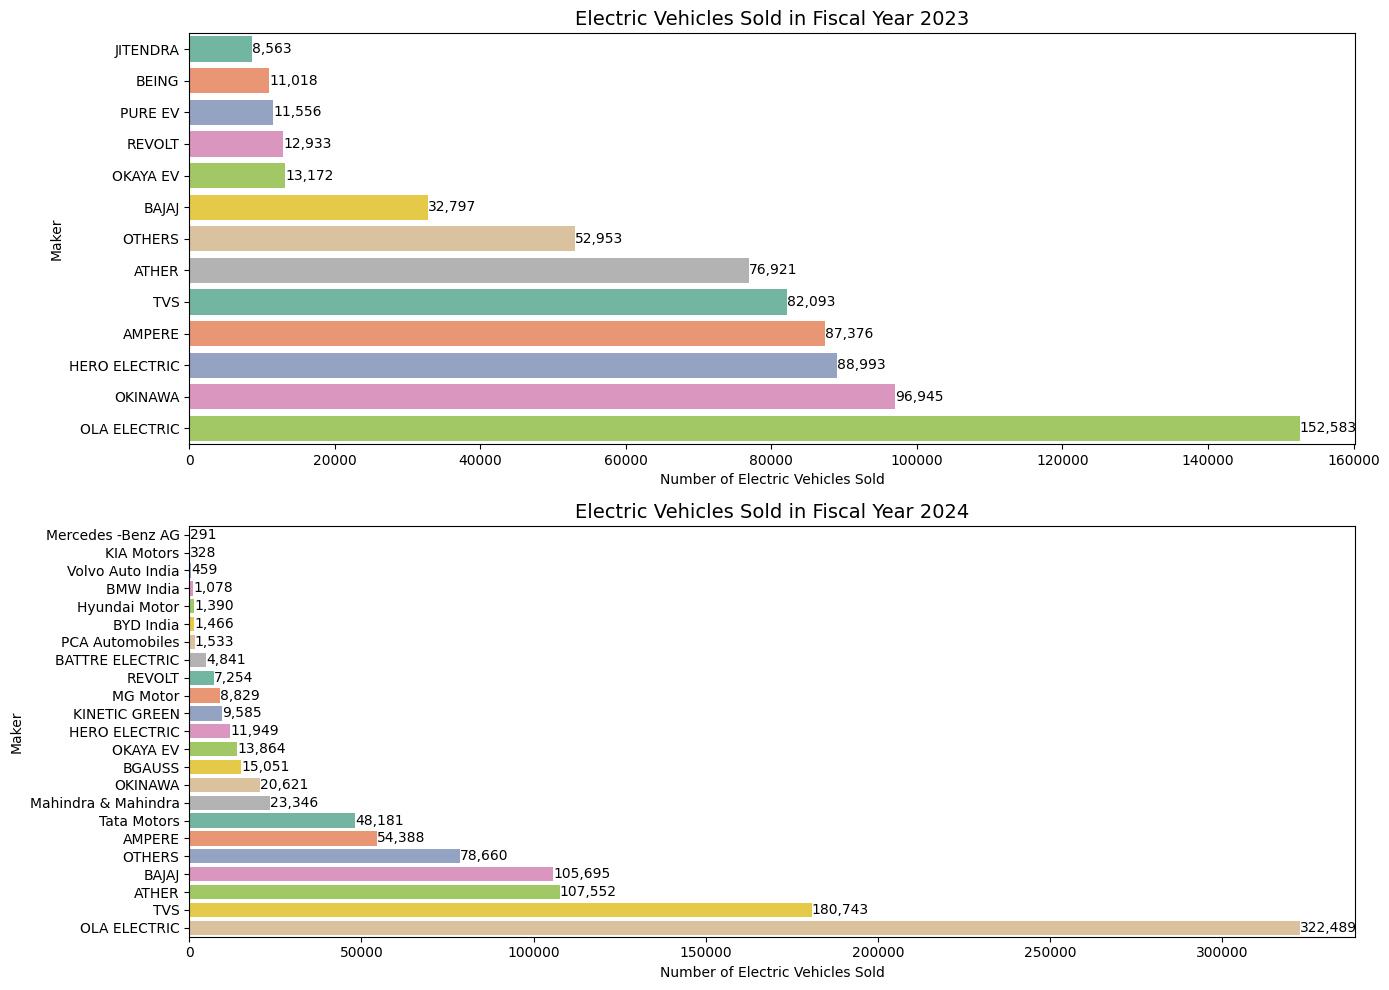

In [94]:
# Create the figure and axes
plt.figure(figsize=(14, 10))

# Separate subplots for each fiscal year
years = df_highest_evsold['fiscal_year'].unique()
for i, year in enumerate(years):
    # Create a subset of data for each fiscal year
    data_year = df_highest_evsold[df_highest_evsold['fiscal_year'] == year]
    
    # Subplot for each year
    plt.subplot(len(years), 1, i + 1)
    
    # Horizontal bar plot
    sns.barplot(x='electric_vehicles_sold', y='maker', data=data_year, palette='Set2')
    
    # Add data labels
    for index, value in enumerate(data_year['electric_vehicles_sold']):
        plt.text(value, index, f'{value:,}', va='center')

    # Titles and labels
    plt.title(f'Electric Vehicles Sold in Fiscal Year {year}', fontsize=14)
    plt.xlabel('Number of Electric Vehicles Sold')
    plt.ylabel('Maker')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### 2. Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024.

In [95]:
df_salebystatewithdate.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,Penetration_Rate,fiscal_year,quarter
0,01-Apr-21,Sikkim,2-Wheelers,0,398,0.0,2022,Q1
1,01-Apr-21,Sikkim,4-Wheelers,0,361,0.0,2022,Q1
2,01-May-21,Sikkim,2-Wheelers,0,113,0.0,2022,Q1
3,01-May-21,Sikkim,4-Wheelers,0,98,0.0,2022,Q1
4,01-Jun-21,Sikkim,2-Wheelers,0,229,0.0,2022,Q1


In [96]:
df_salebystatewithdate.state.unique().size

33

In [97]:
df_penetration_rate=df_salebystatewithdate[(df_salebystatewithdate['fiscal_year'] == 2024)]
df_penetration_rate.head(10)

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,Penetration_Rate,fiscal_year,quarter
48,01-Apr-23,Sikkim,2-Wheelers,0,465,0.0,2024,Q1
49,01-Apr-23,Sikkim,4-Wheelers,0,439,0.0,2024,Q1
50,01-May-23,Sikkim,2-Wheelers,0,507,0.0,2024,Q1
51,01-May-23,Sikkim,4-Wheelers,0,448,0.0,2024,Q1
52,01-Jun-23,Sikkim,2-Wheelers,0,517,0.0,2024,Q1
53,01-Jun-23,Sikkim,4-Wheelers,0,457,0.0,2024,Q1
54,01-Jul-23,Sikkim,2-Wheelers,0,423,0.0,2024,Q2
55,01-Jul-23,Sikkim,4-Wheelers,0,371,0.0,2024,Q2
56,01-Aug-23,Sikkim,2-Wheelers,0,465,0.0,2024,Q2
57,01-Aug-23,Sikkim,4-Wheelers,0,460,0.0,2024,Q2


In [98]:
df_penetration_rate=pd.DataFrame(df_salebystatewithdate.groupby(['vehicle_category','state'],group_keys=False)['Penetration_Rate'].mean())
df_penetration_rate=df_penetration_rate.sort_values(by='Penetration_Rate').reset_index()
df_penetration_rate.head()

,vehicle_category,state,Penetration_Rate
0,2-Wheelers,Sikkim,0.000000
1,4-Wheelers,Sikkim,0.000000
2,4-Wheelers,Mizoram,0.005278
3,2-Wheelers,Arunachal Pradesh,0.009444
4,4-Wheelers,Nagaland,0.014722


In [99]:
# Load India's state boundaries shapefile (You can download this from public sources) refer : https://www.linkedin.com/feed/update/urn:li:activity:7247991168561504256/

india_states = gpd.read_file('map/gadm41_IND_1.shp')
india_states.head(3)

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,IND.1_1,IND,India,Andaman and Nicobar,Andaman & Nicobar Islands|Andama,NA,Union Territor,Union Territory,NA,IN.AN,NA,"MULTIPOLYGON (((93.79078 6.85139, 93.79092 6.8..."
1,IND.2_1,IND,India,Andhra Pradesh,NA,NA,State,State,NA,IN.AP,IN-AP,"MULTIPOLYGON (((78.73952 13.04549, 78.73218 13..."
2,IND.3_1,IND,India,Arunachal Pradesh,Agence de la Frontière du Nord-E,NA,State,State,NA,IN.AR,IN-AR,"POLYGON ((95.3683 27.10736, 95.37366 27.108, 9..."


Visualizing the states in relation to their penetration rates.

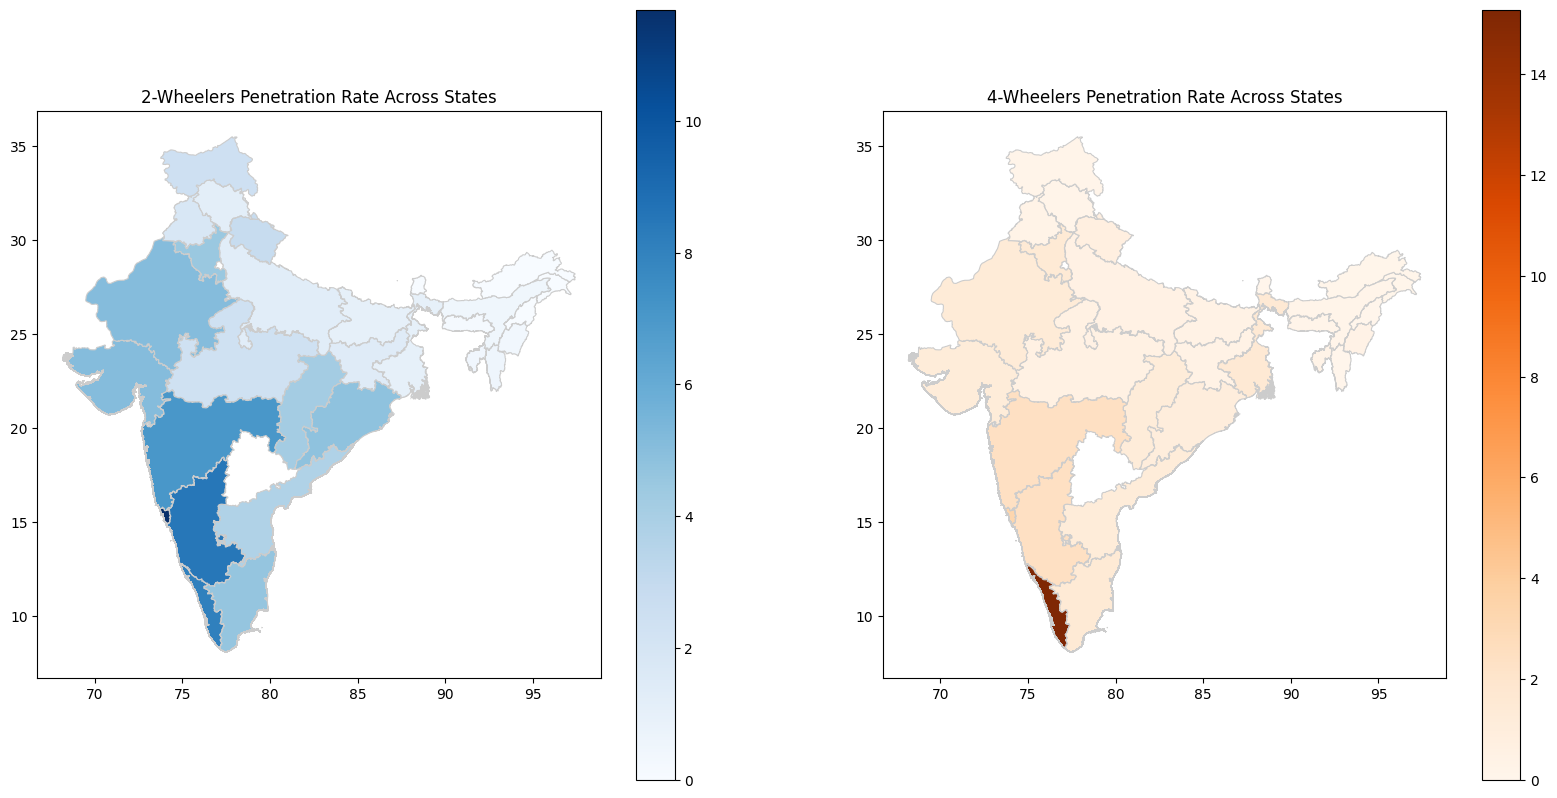

In [100]:
# Separate the data for 2-wheelers and 4-wheelers
two_wheelers = df_penetration_rate[df_penetration_rate['vehicle_category'] == '2-Wheelers']
four_wheelers = df_penetration_rate[df_penetration_rate['vehicle_category'] == '4-Wheelers']

# Merge the data with the GeoDataFrame based on state
two_wheelers_merged = india_states.merge(two_wheelers, left_on='NAME_1', right_on='state', how='left')
four_wheelers_merged = india_states.merge(four_wheelers, left_on='NAME_1', right_on='state', how='left')

# Create the plot for 2-Wheelers Penetration Rate
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

two_wheelers_merged.plot(column='Penetration_Rate', cmap='Blues', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True)
ax[0].set_title('2-Wheelers Penetration Rate Across States')

# Create the plot for 4-Wheelers Penetration Rate
four_wheelers_merged.plot(column='Penetration_Rate', cmap='Oranges', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True)
ax[1].set_title('4-Wheelers Penetration Rate Across States')

# Display the plots
plt.show()


Top 5 states which has higher penetration rates

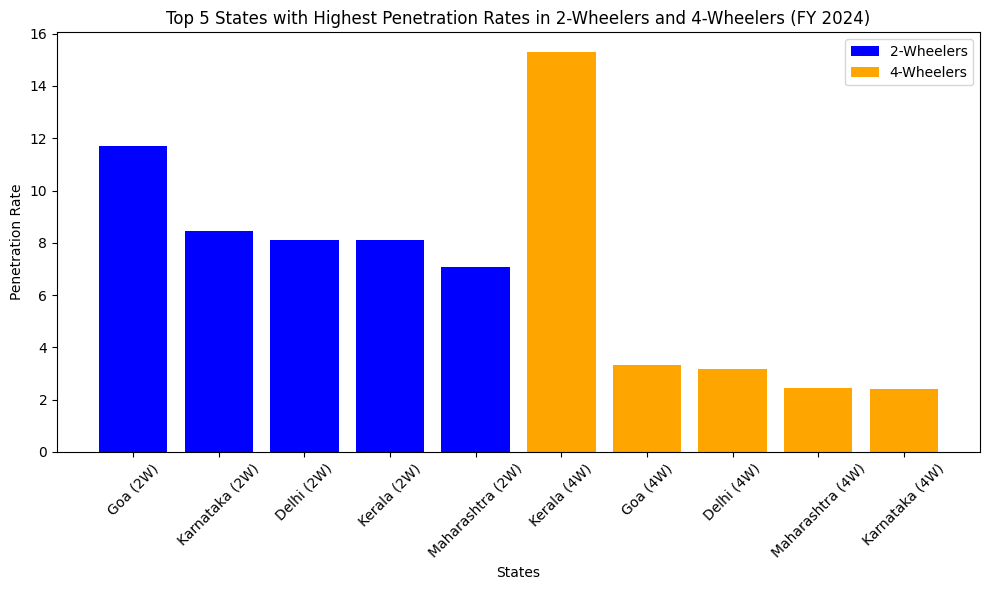

In [101]:
# For each state in the top 2-wheeler and 4-wheeler DataFrames, I added a suffix indicating the category ( (2W) for 2-wheelers and (4W) for 4-wheelers).
# With these modifications, your bar chart will clearly indicate which penetration rates correspond to 2-wheelers and which correspond to 4-wheelers, 
# even if they are from the same states. This approach enhances the clarity of your visualization, making it easier for viewers to interpret the data.
top_2_wheelers = df_penetration_rate[df_penetration_rate['vehicle_category'] == '2-Wheelers'].nlargest(5, 'Penetration_Rate')
top_4_wheelers = df_penetration_rate[df_penetration_rate['vehicle_category'] == '4-Wheelers'].nlargest(5, 'Penetration_Rate')

# Add suffix to states to differentiate them
top_2_wheelers['state'] = top_2_wheelers['state'] + ' (2W)'
top_4_wheelers['state'] = top_4_wheelers['state'] + ' (4W)'

# Concatenate the two DataFrames
top_states_combined = pd.concat([top_2_wheelers, top_4_wheelers])

# Visualize
plt.figure(figsize=(10, 6))
bars = plt.bar(top_states_combined['state'], top_states_combined['Penetration_Rate'], color=['blue' if '2W' in x else 'orange' for x in top_states_combined['state']])

# Adding labels and title
plt.xlabel('States')
plt.ylabel('Penetration Rate')
plt.title('Top 5 States with Highest Penetration Rates in 2-Wheelers and 4-Wheelers (FY 2024)')
plt.xticks(rotation=45)
plt.legend(handles=[bars[0], bars[5]], labels=['2-Wheelers', '4-Wheelers'])

# Display the plot
plt.tight_layout()
plt.show()

### 3.Listing the states with negative penetration (decline) in EV sales from 2022 to 2024 

In [102]:
df_salebystatewithdate.fiscal_year.unique()

array([2022, 2023, 2024], dtype=int64)

In [103]:
df_salebystatewithdate.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,Penetration_Rate,fiscal_year,quarter
0,01-Apr-21,Sikkim,2-Wheelers,0,398,0.0,2022,Q1
1,01-Apr-21,Sikkim,4-Wheelers,0,361,0.0,2022,Q1
2,01-May-21,Sikkim,2-Wheelers,0,113,0.0,2022,Q1
3,01-May-21,Sikkim,4-Wheelers,0,98,0.0,2022,Q1
4,01-Jun-21,Sikkim,2-Wheelers,0,229,0.0,2022,Q1


In [104]:
df_for_negpenetration = df_salebystatewithdate.groupby(['state', 'fiscal_year'])['Penetration_Rate'].mean().reset_index()
df_for_negpenetration.head()

,state,fiscal_year,Penetration_Rate
0,Andaman & Nicobar,2022,0.648696
1,Andaman & Nicobar,2023,0.312917
2,Andaman & Nicobar,2024,0.560417
3,Andhra Pradesh,2022,1.280833
4,Andhra Pradesh,2023,2.901250


In [105]:
df_for_negpenetration_chng = df_for_negpenetration[df_for_negpenetration['fiscal_year'] != 2023]

# Pivot the table to have fiscal years as columns for easier comparison
pivoted = df_for_negpenetration_chng.pivot(index='state', columns='fiscal_year', values='Penetration_Rate')

# Calculate the change in penetration rate from 2022 to 2024
pivoted['change'] = pivoted[2024] - pivoted[2022]


# print(pivoted[2023])
# Filter for states with negative changes
negative_penetration = pivoted[pivoted['change'] < 0]
# Display the result
print(negative_penetration)

fiscal_year            2022      2024    change
state                                          
Andaman & Nicobar  0.648696  0.560417 -0.088279
Ladakh             2.638750  2.014583 -0.624167


### 4. The quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024

In [106]:
df_salebymakerwithdate.head(3)

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
1,01-Apr-22,2-Wheelers,OKAYA EV,0,2023,Q1
2,01-May-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1


In [107]:
df_4wheeler_trends = df_salebymakerwithdate[df_salebymakerwithdate['vehicle_category'] == "4-Wheelers"]
df_4wheeler_trends['fiscal_year'].unique()

array([2022, 2023, 2024], dtype=int64)

In [108]:
top_evmakers = df_4wheeler_trends.groupby('maker')['electric_vehicles_sold'].sum().reset_index()
top_5evmaker=top_evmakers.nlargest(5,'electric_vehicles_sold')['maker'].tolist()
top_5evmaker

['Tata Motors',
 'Mahindra & Mahindra',
 'MG Motor',
 'BYD India',
 'Hyundai Motor']

In [109]:
# grouping_trends =df_4wheeler_trends.groupby(['maker','quarter'])['electric_vehicles_sold'].sum().reset_index()
grouping_trends =df_4wheeler_trends.groupby(['maker','fiscal_year','quarter'])['electric_vehicles_sold'].sum().reset_index()
grouping_trends = grouping_trends[grouping_trends['maker'].isin(top_5evmaker)]
grouping_trends.head()

,maker,fiscal_year,quarter,electric_vehicles_sold
12,BYD India,2022,Q1,0
13,BYD India,2022,Q2,0
14,BYD India,2022,Q3,1
15,BYD India,2022,Q4,32
16,BYD India,2023,Q1,81


C:\Users\HP\AppData\Local\Temp\ipykernel_13592\571863189.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='electric_vehicles_sold', y='maker', data=data_year, palette='Set2',ci=None)
C:\Users\HP\AppData\Local\Temp\ipykernel_13592\571863189.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='electric_vehicles_sold', y='maker', data=data_year, palette='Set2',ci=None)
C:\Users\HP\AppData\Local\Temp\ipykernel_13592\571863189.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='electric_vehicles_sold', y='maker', data=data_year, palette='Set2',ci=None)
C:\Users\HP\AppData\Local\Temp\ipykernel_13592\571863189.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

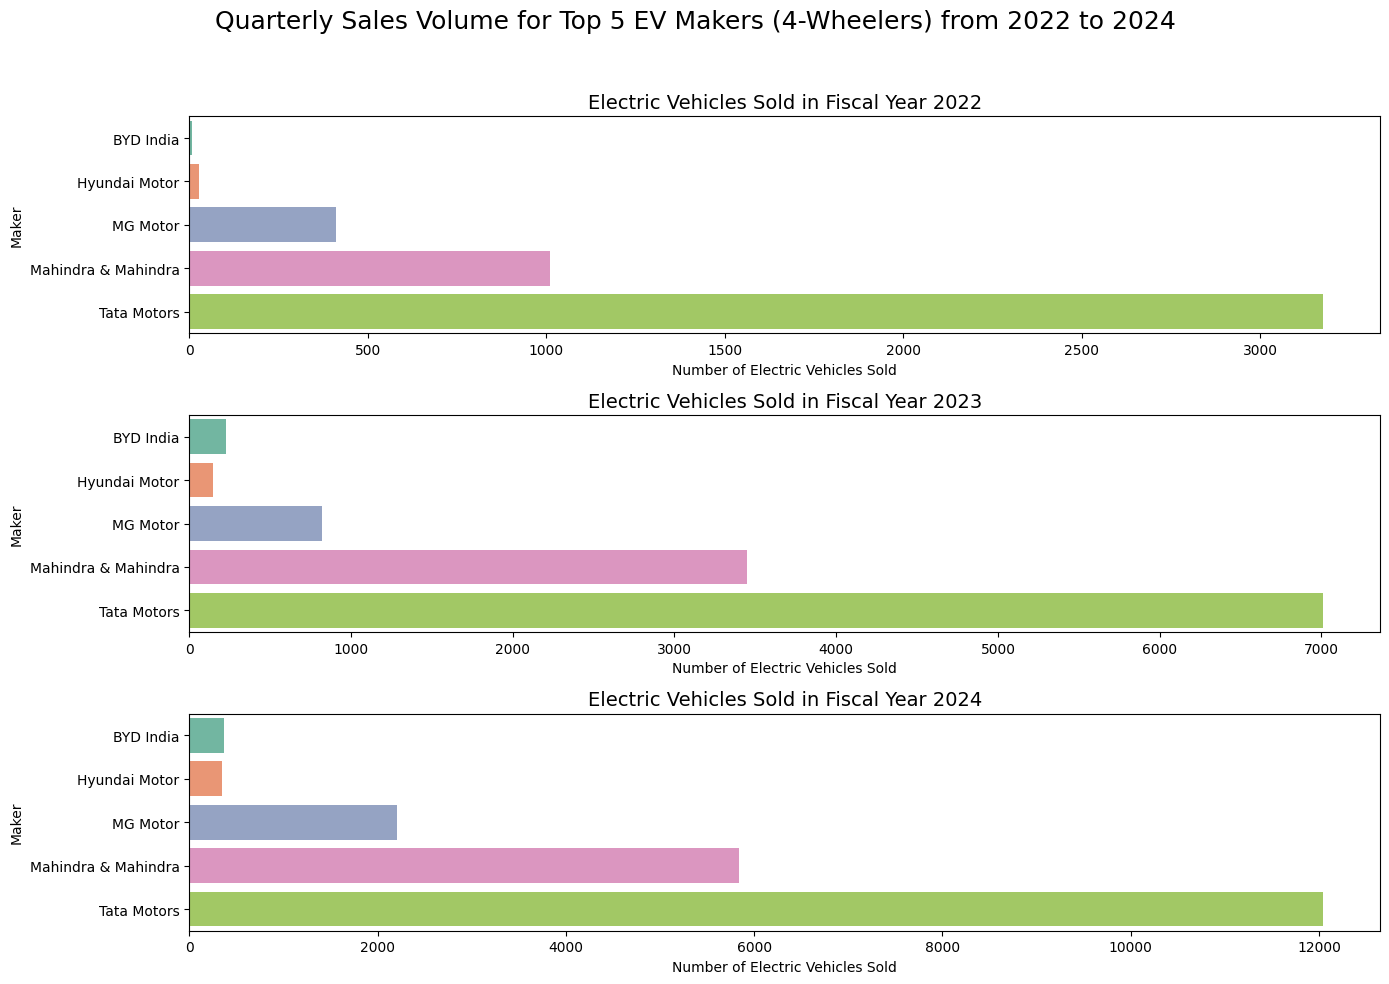

In [110]:
# Create the figure and axes
plt.figure(figsize=(14, 10))

# Separate subplots for each fiscal year
years = grouping_trends['fiscal_year'].unique()
for i, year in enumerate(years):
    # Create a subset of data for each fiscal year
    data_year = grouping_trends[grouping_trends['fiscal_year'] == year]
    
    # Subplot for each year
    plt.subplot(len(years), 1, i + 1)
    
    # Horizontal bar plot
    sns.barplot(x='electric_vehicles_sold', y='maker', data=data_year, palette='Set2',ci=None)
    
    # Titles and labels
    plt.title(f'Electric Vehicles Sold in Fiscal Year {year}', fontsize=14)
    plt.xlabel('Number of Electric Vehicles Sold')
    plt.ylabel('Maker')

# Adjust layout for better spacing
plt.suptitle('Quarterly Sales Volume for Top 5 EV Makers (4-Wheelers) from 2022 to 2024',fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 5. The EV sales and penetration rates in Delhi compare to Karnataka for 2024? 

In [111]:
df_salebystatewithdate.state.unique()

array(['Sikkim', 'Andaman & Nicobar', 'Arunachal Pradesh', 'Assam',
       'Chhattisgarh', 'DNH and DD', 'Jammu and Kashmir', 'Ladakh',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Puducherry',
       'Tripura', 'Bihar', 'Haryana', 'Delhi', 'Madhya Pradesh', 'Odisha',
       'Punjab', 'Uttarakhand', 'Himachal Pradesh', 'Jharkhand',
       'Andhra Pradesh', 'Goa', 'Gujarat', 'Karnataka', 'Kerala',
       'Maharashtra', 'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh',
       'West Bengal'], dtype=object)

In [112]:
df_2024 = df_salebystatewithdate[(df_salebystatewithdate['state'].isin(['Delhi','Karnataka'])) & (df_salebystatewithdate['fiscal_year']== 2024)]
df_2024.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,Penetration_Rate,fiscal_year,quarter
1116,01-Apr-23,Delhi,4-Wheelers,551,14861,3.71,2024,Q1
1123,01-Apr-23,Karnataka,4-Wheelers,762,22368,3.41,2024,Q1
1142,01-May-23,Delhi,4-Wheelers,787,16609,4.74,2024,Q1
1149,01-May-23,Karnataka,4-Wheelers,999,22601,4.42,2024,Q1
1169,01-Jun-23,Delhi,4-Wheelers,935,15723,5.95,2024,Q1


In [113]:
df_2024 = df_2024.groupby('state').agg({'Penetration_Rate': 'mean','electric_vehicles_sold': 'sum'}).reset_index()
df_2024.set_index('state', inplace=True)
df_2024.head()

,Penetration_Rate,electric_vehicles_sold
state,,
Delhi,6.98250,46724
Karnataka,7.89375,160989


In [114]:
diff = df_2024.loc['Karnataka'] - df_2024.loc['Delhi']

# Add the difference to the DataFrame
df_2024.loc['diff'] = diff

# Transpose the DataFrame for desired format
df_2024 = df_2024.T

# Display the final DataFrame
print(df_2024)

state                        Delhi     Karnataka          diff
Penetration_Rate            6.9825       7.89375       0.91125
electric_vehicles_sold  46724.0000  160989.00000  114265.00000


### 6. List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024. 

In [115]:
grping_EV_sold  = df_salebymakerwithdate.groupby(['maker','fiscal_year','vehicle_category'])['electric_vehicles_sold'].sum().reset_index()
grping_EV_sold.head()

,maker,fiscal_year,vehicle_category,electric_vehicles_sold
0,AMPERE,2022,2-Wheelers,25510
1,AMPERE,2023,2-Wheelers,87376
2,AMPERE,2024,2-Wheelers,54388
3,ATHER,2022,2-Wheelers,19976
4,ATHER,2023,2-Wheelers,76921


In [116]:
# Remove fiscal year 2023 data
grping_EV_sold_4wheelers = grping_EV_sold[~((grping_EV_sold['vehicle_category'] =='2-Wheelers') | (grping_EV_sold['fiscal_year'] == 2023)) ]

grping_EV_sold_4wheelers.head()

,maker,fiscal_year,vehicle_category,electric_vehicles_sold
13,BMW India,2022,4-Wheelers,7
15,BMW India,2024,4-Wheelers,1078
16,BYD India,2022,4-Wheelers,33
18,BYD India,2024,4-Wheelers,1466
22,Hyundai Motor,2022,4-Wheelers,110


In [117]:
# Pivot the table to have fiscal years as columns for easier comparison
df_cagr_pvt = grping_EV_sold_4wheelers.pivot(index='maker', columns='fiscal_year', values='electric_vehicles_sold')

# Fill NaN values with 0
df_cagr_pvt.fillna(0, inplace=True)

# Define a function to calculate CAGR, handle zero or negative values
def calculate_cagr(start, end, periods):
    if start <= 0 or end <= 0:
        return 0  # Return 0 for invalid cases (zero or negative sales)
    return (end / start) ** (1 / periods) - 1

# Apply the function for each row (CAGR from 2022 to 2024)
df_cagr_pvt['CAGR_2022_2024'] = df_cagr_pvt.apply(lambda x: calculate_cagr(x.get(2022, 0), x.get(2024, 0), 2), axis=1)

# Display the result
df_cagr_pvt.nlargest(5,'CAGR_2022_2024')


fiscal_year,2022,2024,CAGR_2022_2024
maker,,,
BMW India,7,1078,11.409674
Volvo Auto India,4,459,9.712143
BYD India,33,1466,5.665151
Hyundai Motor,110,1390,2.554766
Mercedes -Benz AG,26,291,2.345491


### 7. List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.

In [118]:
# Pivot the table to have fiscal years as columns for easier comparison
df_cagr_pvt = grping_EV_sold.pivot(index='maker', columns='fiscal_year', values='electric_vehicles_sold')

# Fill NaN values with 0
df_cagr_pvt.fillna(0, inplace=True)

# Define a function to calculate CAGR, handle zero or negative values
def calculate_cagr(start, end, periods):
    if start <= 0 or end <= 0:
        return 0  # Return 0 for invalid cases (zero or negative sales)
    return (end / start) ** (1 / periods) - 1

# Apply the function for each row (CAGR from 2022 to 2024)
df_cagr_pvt['CAGR_2022_2024'] = df_cagr_pvt.apply(lambda x: calculate_cagr(x.get(2022, 0), x.get(2024, 0), 2), axis=1)

# Display the result
df_cagr_pvt.nlargest(10,'CAGR_2022_2024')

fiscal_year,2022,2023,2024,CAGR_2022_2024
maker,,,,
BMW India,7.0,285.0,1078.0,11.409674
Volvo Auto India,4.0,105.0,459.0,9.712143
BYD India,33.0,920.0,1466.0,5.665151
OLA ELECTRIC,14401.0,152583.0,322489.0,3.732179
TVS,9739.0,82093.0,180743.0,3.307979
BAJAJ,7114.0,32797.0,105695.0,2.854520
Hyundai Motor,110.0,576.0,1390.0,2.554766
Mercedes -Benz AG,26.0,71.0,291.0,2.345491
Mahindra & Mahindra,4042.0,13805.0,23346.0,1.403301


### 8. The peak and low season months for EV sales based on the data from 2022 to 2024? 

In [119]:
df_salebymakerwithdate.head()

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
1,01-Apr-22,2-Wheelers,OKAYA EV,0,2023,Q1
2,01-May-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0,2022,Q2


In [120]:
seasonal_month = df_salebymakerwithdate

In [121]:
seasonal_month['date'] = pd.to_datetime(seasonal_month['date'])

# Extract month and year
seasonal_month['month_year'] = seasonal_month['date'].dt.to_period('M')

seasonal_month.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_13592\1943847441.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  seasonal_month['date'] = pd.to_datetime(seasonal_month['date'])


,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter,month_year
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,2021-04
1,2022-04-01,2-Wheelers,OKAYA EV,0,2023,Q1,2022-04
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,2021-05
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,2021-06
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,2022,Q2,2021-07


In [122]:
seasonal_month = seasonal_month.groupby('month_year')['electric_vehicles_sold'].sum().sort_values()
peakmonth = seasonal_month.head(1)
lowmonth = seasonal_month.tail(1)
seasonal_month .head()

month_year
2021-05     1499
2021-06     5487
2021-04     6315
2021-07    15794
2021-08    17153
Freq: M, Name: electric_vehicles_sold, dtype: int64

In [123]:
print("The peak season months for EV sales based on the data from 2022 to 2024 is ",peakmonth.index[0],"\nAnd low season months for EV sales based on the data from 2022 to 2024 is ",lowmonth.index[0]) 

The peak season months for EV sales based on the data from 2022 to 2024 is  2021-05 
And low season months for EV sales based on the data from 2022 to 2024 is  2024-03


### 10. Estimate the revenue growth rate of 4-wheeler and 2-wheelers EVs in India for 2022 vs 2024 and 2023 vs 2024, assuming an average unit price.


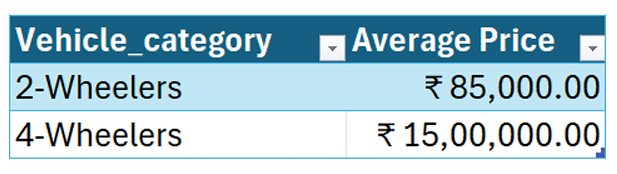

In [124]:
df_salebymakerwithdate.head()

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter,month_year
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,2021-04
1,2022-04-01,2-Wheelers,OKAYA EV,0,2023,Q1,2022-04
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,2021-05
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,2021-06
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,2022,Q2,2021-07


In [126]:
revenuegrowth = df_salebymakerwithdate.groupby(['vehicle_category','fiscal_year'])['electric_vehicles_sold'].sum().reset_index()
revenuegrowth.head()

,vehicle_category,fiscal_year,electric_vehicles_sold
0,2-Wheelers,2022,252573
1,2-Wheelers,2023,727903
2,2-Wheelers,2024,932692
3,4-Wheelers,2022,18577
4,4-Wheelers,2023,47465


In [129]:
revenuegrowth['Avg_price'] = (revenuegrowth['electric_vehicles_sold']*85000).where(revenuegrowth['vehicle_category'] == '2-Wheelers',other=(revenuegrowth['electric_vehicles_sold']*1500000))
revenuegrowth

,vehicle_category,fiscal_year,electric_vehicles_sold,Avg_price
0,2-Wheelers,2022,252573,21468705000
1,2-Wheelers,2023,727903,61871755000
2,2-Wheelers,2024,932692,79278820000
3,4-Wheelers,2022,18577,27865500000
4,4-Wheelers,2023,47465,71197500000
5,4-Wheelers,2024,86901,130351500000


In [138]:
# Pivot table for easier comparison between years
sales_pivot = revenuegrowth.pivot(index='vehicle_category', columns='fiscal_year', values='Avg_price')

# Calculate growth rates
Growth_2022_2024 = (((sales_pivot[2024] - sales_pivot[2022]) / sales_pivot[2022]) * 100).round(2)
Growth_2023_2024 = (((sales_pivot[2024] - sales_pivot[2023]) / sales_pivot[2023]) * 100).round(2)

print("The revenue growth rate of 2-wheeler and 4-wheelers EVs in India for 2023 vs 2024 are ",Growth_2022_2024[0]," and ",Growth_2022_2024[1],"\nThe revenue growth rate of 2-wheeler and 4-wheelers EVs in India for 2022 vs 2024 are ",Growth_2023_2024[0]," and ",Growth_2023_2024[1])

The revenue growth rate of 2-wheeler and 4-wheelers EVs in India for 2023 vs 2024 are  269.28  and  367.79 
The revenue growth rate of 2-wheeler and 4-wheelers EVs in India for 2022 vs 2024 are  28.13  and  83.08


C:\Users\HP\AppData\Local\Temp\ipykernel_13592\1576051637.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("The revenue growth rate of 2-wheeler and 4-wheelers EVs in India for 2023 vs 2024 are ",Growth_2022_2024[0]," and ",Growth_2022_2024[1],"\nThe revenue growth rate of 2-wheeler and 4-wheelers EVs in India for 2022 vs 2024 are ",Growth_2023_2024[0]," and ",Growth_2023_2024[1])
